<a href="https://colab.research.google.com/github/lee-j-j/LJJ/blob/main/ex04_%EC%9D%B4%EC%A7%84%EB%B6%84%EB%A5%98_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 목표
- 직접 수집한 사진 데이터로 이진분류 딥러닝 모델을 만들어보자.

In [1]:
# 작업 디렉토리 변경
%cd /content/drive/MyDrive/Colab Notebooks/사물지능A

/content/drive/MyDrive/Colab Notebooks/사물지능A


In [2]:
# 현재 작업 디렉토리 확인
!pwd

/content/drive/MyDrive/Colab Notebooks/사물지능A


In [5]:
# 압축풀기 (drive엔 압축파일 그대로 올리고 colab에서 압축풀기 추천!)
# \ + ' '(띄어쓰기) : 리눅스에서 띄어쓰기 인식 (이스케이프 시퀀스)
!unzip ./data/img/class2-samples.zip -d ./data/img/class2

Archive:  ./data/img/class2-samples.zip
 extracting: ./data/img/class2/0.jpg  
 extracting: ./data/img/class2/1.jpg  
 extracting: ./data/img/class2/2.jpg  
 extracting: ./data/img/class2/3.jpg  
 extracting: ./data/img/class2/4.jpg  
 extracting: ./data/img/class2/5.jpg  
 extracting: ./data/img/class2/6.jpg  
 extracting: ./data/img/class2/7.jpg  
 extracting: ./data/img/class2/8.jpg  
 extracting: ./data/img/class2/9.jpg  
 extracting: ./data/img/class2/10.jpg  
 extracting: ./data/img/class2/11.jpg  
 extracting: ./data/img/class2/12.jpg  
 extracting: ./data/img/class2/13.jpg  
 extracting: ./data/img/class2/14.jpg  
 extracting: ./data/img/class2/15.jpg  
 extracting: ./data/img/class2/16.jpg  
 extracting: ./data/img/class2/17.jpg  
 extracting: ./data/img/class2/18.jpg  
 extracting: ./data/img/class2/19.jpg  
 extracting: ./data/img/class2/20.jpg  
 extracting: ./data/img/class2/21.jpg  
 extracting: ./data/img/class2/22.jpg  
 extracting: ./data/img/class2/23.jpg  
 extractin

In [4]:
# 폴더이름 변경
!mv ./data/img/class1-samples ./data/img/class1

### 데이터 로딩

In [23]:
import cv2 # 파이썬 이미지 라이브러리 대표
import os # 파이썬으로 시스템 정보를 확인하고 제어하는 라이브러리
import matplotlib.pyplot as plt # 시각화 라이브러리
import numpy as np
from tqdm import tqdm

In [ ]:
# 특정 폴더 밑에 있는 파일이나 폴더명 얻어내기
class1_file_names = os.listdir("./data/img/class1") # 리눅스 명령어 !ls 와 비슷
class1_file_names

In [ ]:
class2_file_names = os.listdir("./data/img/class2")
class2_file_names

In [14]:
# 사진 한장 오픈
img_path = "./data/img/class1/" + class1_file_names[0]
img_path

'./data/img/class1/7.jpg'

In [18]:
img_data = cv2.imread(img_path) # 이미지를 읽어들이는 함수 (BGR 순서로 읽어들임!)
img_data_rgb = cv2.cvtColor(img_data,cv2.COLOR_BGR2RGB)
img_data.shape # (224, 224, 3) → 세로, 가로, 한 픽셀당 데이터 갯수(RGB)

(224, 224, 3)

In [ ]:
plt.imshow(img_data_rgb) # (RGB 순서로 인식)

In [22]:
imgs_class1 = [] # 전체 이미지가 들어갈 리스트
for fname in class1_file_names :
  img_path = "./data/img/class1/" + fname
  img_data = cv2.imread(img_path)
  img_data_rgb = cv2.cvtColor(img_data,cv2.COLOR_BGR2RGB)
  imgs_class1.append(img_data_rgb)

# 전체 리스트를 numpy 타입으로 변경
imgs_class1 = np.array(imgs_class1)

In [24]:
imgs_class1.shape # (250, 244, 244, 3) → 샘플 갯수, 세로 크기, 가로 크기, 컬러(RGB)

(250, 224, 224, 3)

In [25]:
imgs_class2 = [] # 전체 이미지가 들어갈 리스트
for fname in tqdm(class2_file_names) :
  img_path = "./data/img/class2/" + fname
  img_data = cv2.imread(img_path)
  img_data_rgb = cv2.cvtColor(img_data,cv2.COLOR_BGR2RGB)
  imgs_class2.append(img_data_rgb)

# 전체 리스트를 numpy 타입으로 변경
imgs_class2 = np.array(imgs_class2)

100%|██████████| 250/250 [00:00<00:00, 258.08it/s]


In [26]:
imgs_class2.shape

(250, 224, 224, 3)

### 모델링
- 모델설계
- 모델학습
- 모델예측
- 모델평가

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
# class1 과 class2를 합쳐서 문제와 답 만들기
X = np.concatenate([imgs_class1, imgs_class2])
X.shape

(500, 224, 224, 3)

In [30]:
y = np.array([0]*250 + [1]*250)
y.shape

(500,)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 904, test_size = 0.2)

In [34]:
from tensorflow.keras.models import Sequential # 신경망의 뼈대
from tensorflow.keras.layers import Dense, InputLayer, Flatten # Flatten : 들어오는 레이어를 1차원으로 평평하게 만들어 줌

In [41]:
# 모델 설계
model = Sequential() # 뼈대 생성

# 입력층
model.add(InputLayer(input_shape=(224,224,3))) # 'InputLayer' 생략하고 input_dim을 추가해도 됨
model.add(Flatten())

# 중간층(은닉층)
model.add(Dense(units=68, activation = "sigmoid"))
model.add(Dense(units=128, activation = "sigmoid"))
model.add(Dense(units=68, activation = "sigmoid"))

# 출력층
model.add(Dense(1, activation = "sigmoid")) # 'units = ' 생략 가능

In [42]:
# 모델 학습
model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ['accuracy'])
my_history = model.fit(X_train, y_train, validation_split = 0.2, epochs = 100) # validation_split : 훈련 데이터의 일부를 검증용 데이터로 분할
# batch_size의 디폴트값 = 32

Epoch 1/100
10/10 [==============================] - 5s 388ms/step - loss: 0.6987 - accuracy: 0.5031 - val_loss: 0.7077 - val_accuracy: 0.4625
Epoch 2/100
10/10 [==============================] - 2s 206ms/step - loss: 0.6943 - accuracy: 0.5281 - val_loss: 0.6970 - val_accuracy: 0.4625
Epoch 3/100
10/10 [==============================] - 2s 242ms/step - loss: 0.6951 - accuracy: 0.4844 - val_loss: 0.6971 - val_accuracy: 0.4625
Epoch 4/100
10/10 [==============================] - 2s 230ms/step - loss: 0.6947 - accuracy: 0.5281 - val_loss: 0.6997 - val_accuracy: 0.4625
Epoch 5/100
10/10 [==============================] - 3s 253ms/step - loss: 0.6932 - accuracy: 0.5281 - val_loss: 0.7058 - val_accuracy: 0.4625
Epoch 6/100
10/10 [==============================] - 3s 333ms/step - loss: 0.6937 - accuracy: 0.5281 - val_loss: 0.7009 - val_accuracy: 0.4625
Epoch 7/100
10/10 [==============================] - 3s 297ms/step - loss: 0.6924 - accuracy: 0.5281 - val_loss: 0.6967 - val_accuracy: 0.4625

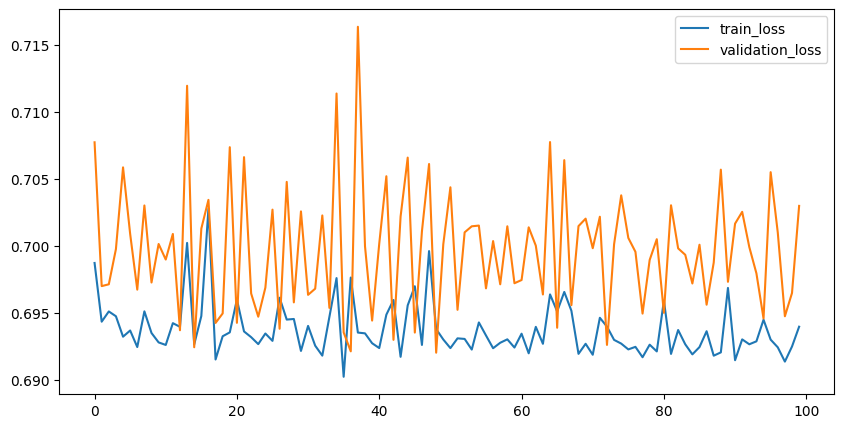

In [43]:
# 학습결과 시각화
plt.figure(figsize = (10,5))
plt.plot(my_history.history['loss'], label = "train_loss")
plt.plot(my_history.history['val_loss'], label = "validation_loss")
plt.legend()
plt.show()

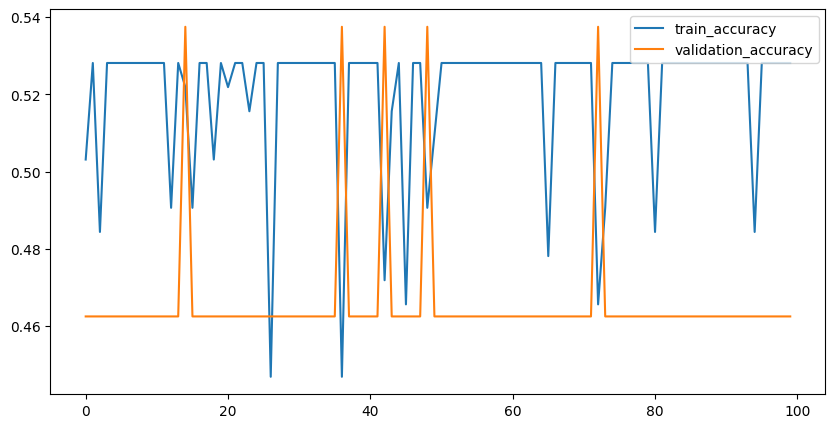

In [44]:
plt.figure(figsize = (10,5))
plt.plot(my_history.history['accuracy'], label = "train_accuracy")
plt.plot(my_history.history['val_accuracy'], label = "validation_accuracy")
plt.legend()
plt.show()

In [ ]:
# 학습이 잘 되지 않을때
# 1) 최적화 도구 점검
# 2) 은닉층 재조정
# 3) 데이터 점검

In [45]:
# 모델 평가
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 37ms/step - loss: 0.7068 - accuracy: 0.4400


[0.7067503333091736, 0.4399999976158142]

In [46]:
# 모델 활용
img_path = "./data/img/class2/" + class1_file_names[100]
img_data = cv2.imread(img_path)
img_data_rgb = cv2.cvtColor(img_data,cv2.COLOR_BGR2RGB)
model.predict(img_data_rgb.reshape(-1, 224, 224, 3))

1/1 [==============================] - 0s 109ms/step


array([[0.5419]], dtype=float32)